In [1]:
import random
import timeit

# These are closures (you can read more about them => https://www.geeksforgeeks.org/python-closures/)
def search_list(list_size):
    l = [ random.random() for _ in range(list_size) ]
    def func():
        k = random.random()
        return k in l
    return func


def search_set(set_size):
    # note that we sample random numbers in [0,1] -- *very* unlikely that we will stumble upon repetitions,
    # so the set size will essentially be "set_size" 
    s = { random.random() for _ in range(set_size) }
    def func():
        k = random.random()
        return k in s
    return func

In [2]:
times_list = []
times_set = []
sizes = range(10, 10_000, 500)

# Compute the search times for various list/set sizes
for size in sizes:
    times_list.append(timeit.timeit(search_list(size), number=10_000))
    times_set.append(timeit.timeit(search_set(size), number=10_000))

Text(0.5, 1.0, 'Search cost - list vs set')

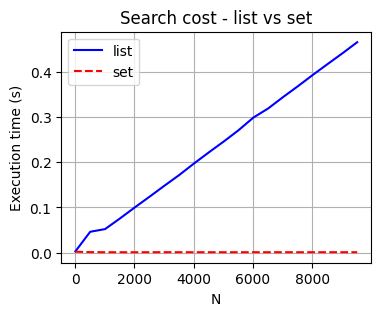

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4,3))
ax.plot(sizes, times_list, label='list', c='b')
ax.plot(sizes, times_set, label='set', c='r', ls='--')
ax.set_xlabel("N")
ax.set_ylabel("Execution time (s)")
ax.legend()
ax.grid()
ax.set_title("Search cost - list vs set")